In [1]:
import torch

In [3]:
! ls *.pkl -lah

-rwxrwx--- 1 f003k8w rc-VaickusL_slow-admin  37K May  2 19:55 aty_aux_pred.pkl
-rwxrwx--- 1 f003k8w rc-VaickusL_slow-admin  91M Apr 30 15:17 aty_net_aux.pkl
-rwxrwx--- 1 f003k8w rc-VaickusL_slow-admin  35K Dec 10 11:58 predictions_atynet_val.pkl
-rwxrwx--- 1 f003k8w rc-VaickusL_slow-admin 582K Oct 11  2020 predictions_class1.pkl
-rwxrwx--- 1 f003k8w rc-VaickusL_slow-admin  45K Oct 11  2020 predictions_class2.pkl
-rwxrwx--- 1 f003k8w rc-VaickusL_slow-admin  34K Oct 11  2020 predictions_class3.pkl
-rwxrwx--- 1 f003k8w rc-VaickusL_slow-admin 699K Oct 26  2020 predictions_class4.pkl
-rwxrwx--- 1 f003k8w rc-VaickusL_slow-admin 804K Dec 10 11:59 predictions_uronet_val.pkl
-rwxrwx--- 1 f003k8w rc-VaickusL_slow-admin  241 Oct 22  2020 tmp_test.pkl
-rwxrwx--- 1 f003k8w rc-VaickusL_slow-admin 1.2M May  3 13:20 uro_aux_pred.pkl


In [74]:
! ls *v3

aty_net_aux_v3:
0.epoch.checkpoint.pth	 3.epoch.checkpoint.pth   62.epoch.checkpoint.pth
1.epoch.checkpoint.pth	 4.epoch.checkpoint.pth   63.epoch.checkpoint.pth
14.epoch.checkpoint.pth  40.epoch.checkpoint.pth  64.epoch.checkpoint.pth
16.epoch.checkpoint.pth  49.epoch.checkpoint.pth  65.epoch.checkpoint.pth
20.epoch.checkpoint.pth  57.epoch.checkpoint.pth  7.epoch.checkpoint.pth
21.epoch.checkpoint.pth  6.epoch.checkpoint.pth   98.epoch.checkpoint.pth

uro_net_aux_v3:
0.epoch.checkpoint.pth	 25.epoch.checkpoint.pth  3.epoch.checkpoint.pth
19.epoch.checkpoint.pth  27.epoch.checkpoint.pth  7.epoch.checkpoint.pth
2.epoch.checkpoint.pth	 28.epoch.checkpoint.pth  9.epoch.checkpoint.pth
24.epoch.checkpoint.pth  29.epoch.checkpoint.pth


In [4]:
predictions_aty=torch.load(f"aty_aux_pred.pkl")

In [5]:
predictions=torch.load(f"uro_aux_pred.pkl")

In [6]:
from scipy.special import softmax
predictions['pred']=softmax(predictions['pred'],1)
predictions_aty['pred']=softmax(predictions_aty['pred'],1)

/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """
/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """
/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """
/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """
/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """
/home/anaconda3/lib/

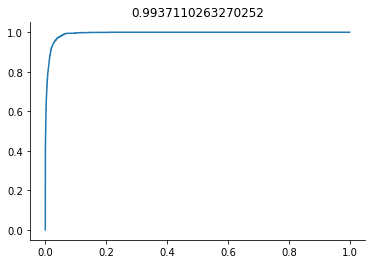

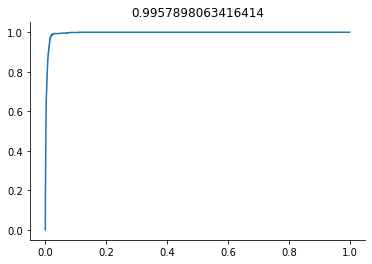

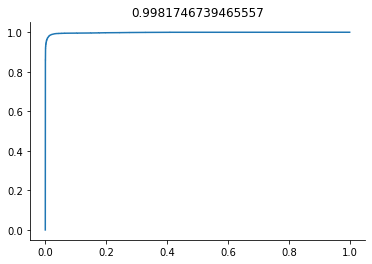

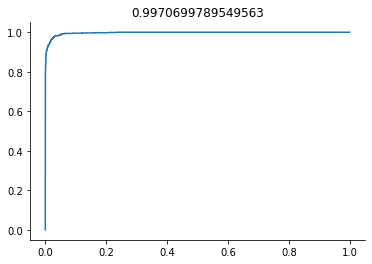

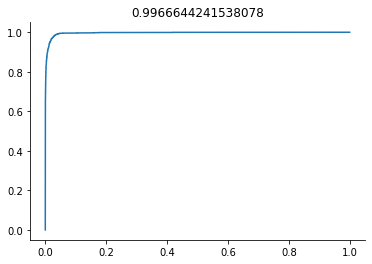

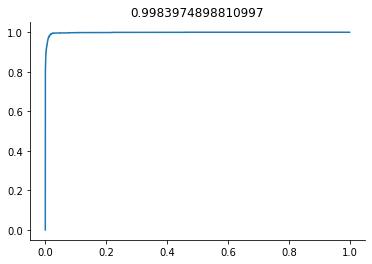

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
for class_i in range(predictions['pred'].shape[1]):
    y_proba=torch.nn.functional.softmax(torch.tensor(predictions['pred'])).numpy()[:,class_i]
    plt.figure()
    plt.plot(*roc_curve(predictions['true']==class_i,y_proba)[:2])
    sns.despine()
    plt.title("{}".format(roc_auc_score(predictions['true']==class_i,y_proba)))

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions['true'],predictions['pred'].argmax(1)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1829
           1       0.77      0.88      0.82       901
           2       1.00      0.97      0.98     18685
           3       0.84      0.91      0.87       856
           4       0.84      0.95      0.89      2009
           5       0.95      0.93      0.94      2817

    accuracy                           0.95     27097
   macro avg       0.87      0.92      0.89     27097
weighted avg       0.96      0.95      0.95     27097



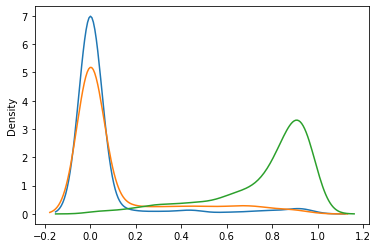

In [9]:
sns.kdeplot(predictions['pred'][predictions['true']==0,1][predictions_aty['true']==0])
sns.kdeplot(predictions['pred'][predictions['true']==0,1][predictions_aty['true']==1])
sns.kdeplot(predictions['pred'][predictions['true']==1,1])

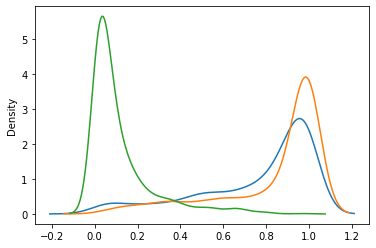

In [10]:
sns.kdeplot(predictions['pred'][predictions['true']==0,0][predictions_aty['true']==0])
sns.kdeplot(predictions['pred'][predictions['true']==0,0][predictions_aty['true']==1])

sns.kdeplot(predictions['pred'][predictions['true']==1,0])

In [11]:
roc_auc_score(predictions['true'],predictions['pred'],multi_class="ovr")

0.9970043057442718

In [4]:
i=3
predictions=torch.load(f"predictions_uronet_val.pkl")#class{i}

In [5]:
d={k:torch.load(f"predictions_{k}.pkl") for k in ["uronet_val","atynet_val"]+['class1','class2','class3','class4']}#['class1','class2','class3','class4']

In [36]:
predictions=d['uronet_val']

In [61]:
sum(torch.nn.functional.softmax(torch.tensor(d['class1']['pred'])).numpy().argmax(1)==0)

/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


2615

In [62]:
len(d['class2']['true'])

2270

In [63]:
sum(torch.nn.functional.softmax(torch.tensor(d['class2']['pred'])).numpy().argmax(1)==0)

/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


653

In [64]:
len(d['class3']['true'])

1668

In [65]:
sum(torch.nn.functional.softmax(torch.tensor(d['class3']['pred'])).numpy().argmax(1)==0)

/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


887

/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  
/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  
/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  
/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


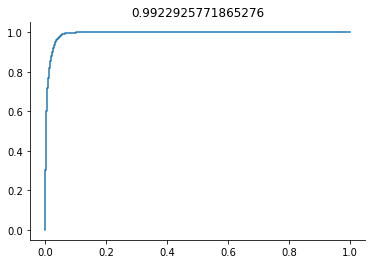

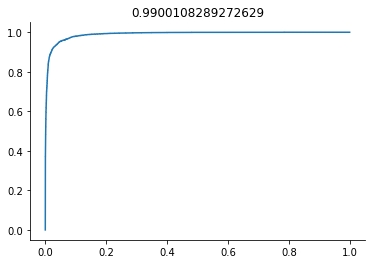

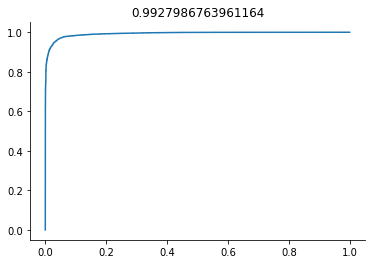

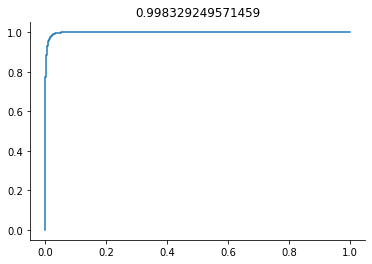

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
class_i=0
for class_i in range(4):
    y_proba=torch.nn.functional.softmax(torch.tensor(predictions['pred'])).numpy()[:,class_i]
    plt.figure()
    plt.plot(*roc_curve(predictions['true']==class_i,y_proba)[:2])
    sns.despine()
    plt.title("{}".format(roc_auc_score(predictions['true']==class_i,y_proba)))

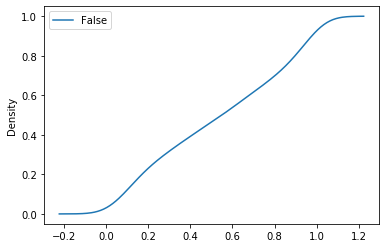

In [28]:
sns.kdeplot(y_proba,hue=predictions['true']==class_i, cumulative=True, common_norm=False, common_grid=True,)#multiple="fill")

In [20]:
(predictions['pred'].argmax(1)==class_i).mean()

0.0

In [21]:
(predictions['true']==class_i).mean()

0.0

In [22]:
((predictions['true']==class_i)==(predictions['pred'].argmax(1)==class_i)).mean()

1.0

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions['true'],predictions['pred'].argmax(1)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1668
           1       0.92      0.89      0.91      4328
           2       0.98      0.97      0.97     15885
           3       0.68      0.91      0.78       602

    accuracy                           0.94     22483
   macro avg       0.85      0.91      0.88     22483
weighted avg       0.95      0.94      0.95     22483



In [38]:
print(classification_report(predictions['true'],predictions['pred'].argmax(1)))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1735
           1       0.91      0.92      0.91      4997
           2       0.98      0.95      0.97     15885
           3       0.90      0.96      0.93      2817

    accuracy                           0.94     25434
   macro avg       0.89      0.92      0.90     25434
weighted avg       0.94      0.94      0.94     25434



In [39]:
confusion_matrix(predictions['true'],predictions['pred'].argmax(1))

array([[ 1506,    20,     6,   203],
       [  117,  4576,   289,    15],
       [  249,   449, 15091,    96],
       [  101,     0,     1,  2715]])

In [43]:
predictions=torch.load("predictions_class3.pkl")

In [44]:
y_proba=torch.nn.functional.softmax(torch.tensor(predictions['pred'])).numpy()[:,1]

/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


In [45]:
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve


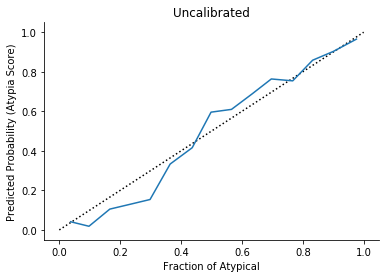

In [51]:
import matplotlib.pyplot as plt
fraction_of_positives, mean_predicted_value=calibration_curve(predictions['true'],y_proba,n_bins=15)
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.plot(mean_predicted_value,fraction_of_positives)
plt.xlabel("Fraction of Atypical")
plt.ylabel("Predicted Probability (Atypia Score)")
plt.title("Uncalibrated")
sns.despine()

In [49]:
from sklearn.isotonic import IsotonicRegression
import numpy as np
x_iso,y_iso=calibration_curve(predictions['true'],y_proba,n_bins=10)[::-1]
x_iso=np.array([0.]+x_iso.tolist()+[1.])
y_iso=np.array([0.]+y_iso.tolist()+[1.])
prob_correction=IsotonicRegression(0,1).fit(x_iso,y_iso)

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass y_min=0, y_max=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


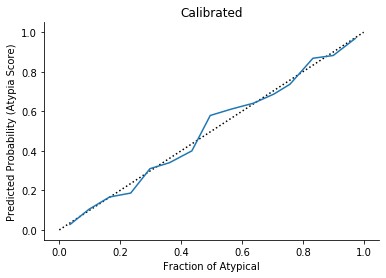

In [52]:
fraction_of_positives, mean_predicted_value=calibration_curve(predictions['true'],prob_correction.transform(y_proba),n_bins=15)
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.plot(mean_predicted_value,fraction_of_positives)
plt.xlabel("Fraction of Atypical")
plt.ylabel("Predicted Probability (Atypia Score)")
plt.title("Calibrated")

sns.despine()

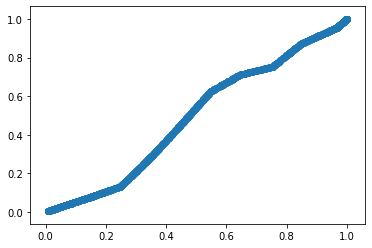

In [99]:
plt.scatter(y_proba,prob_correction.transform(y_proba)) # bad

Text(0.5, 1.0, 'Uncalibrated')

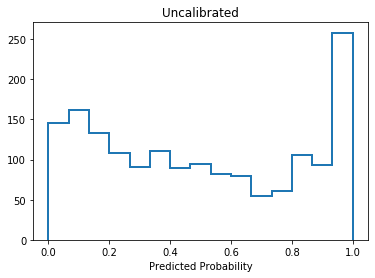

In [55]:

plt.hist(y_proba, range=(0, 1), bins=15, 
                 histtype="step", lw=2)
plt.xlabel("Predicted Probability")
plt.title("Uncalibrated")

Text(0.5, 1.0, 'Calibrated')

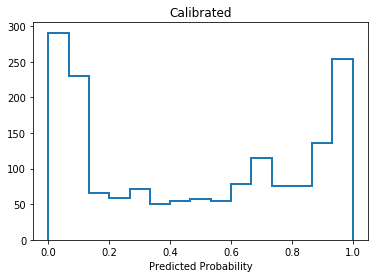

In [54]:

plt.hist(prob_correction.transform(y_proba), range=(0, 1), bins=15, 
                 histtype="step", lw=2)
plt.xlabel("Predicted Probability")
plt.title("Calibrated")



(array([145., 162., 133., 108.,  91., 111.,  89.,  94.,  82.,  80.,  55.,
         61., 106.,  93., 258.]),
 array([0.        , 0.06666667, 0.13333334, 0.2       , 0.26666668,
        0.33333334, 0.4       , 0.46666667, 0.53333336, 0.6       ,
        0.6666667 , 0.73333335, 0.8       , 0.8666667 , 0.93333334,
        1.        ], dtype=float32),
 <a list of 1 Patch objects>)

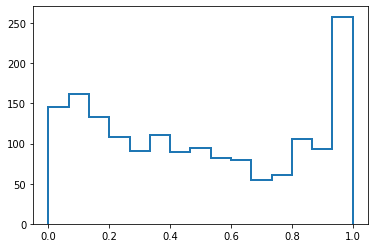

In [101]:
plt.hist(y_proba, range=(0, 1), bins=15, 
                 histtype="step", lw=2)

In [102]:
from sklearn.metrics import roc_curve,roc_auc_score,brier_score_loss

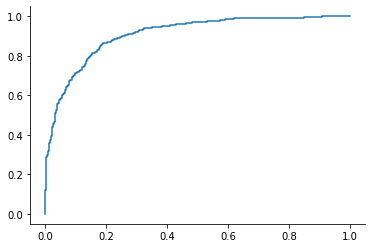

In [103]:
import seaborn as sns

plt.plot(*roc_curve(predictions['true'],y_proba)[:2])
sns.despine()

In [104]:
roc_auc_score(predictions['true'],y_proba)

0.9077348543773226

In [105]:
brier_score_loss(predictions['true'],y_proba)

0.12444930395474209

In [106]:
prob_correction.transform(y_proba)

array([0.69078484, 0.31901328, 0.0192991 , ..., 0.03007168, 0.62903007,
       0.03459481])

In [107]:
y_proba

array([0.6224409 , 0.36908242, 0.03510762, ..., 0.05474484, 0.55248344,
       0.06361664], dtype=float32)

In [108]:
brier_score_loss(predictions['true'],prob_correction.transform(y_proba))

0.12134880587668737